In [ ]:
# banking Finanace

In [ ]:
# The customer will buy or not a FD or some investment plan?

In [ ]:
# InDependent variables:

# age : age of the client 
# job : type of the job 
# marital : marital status
# education : level of education 
# default : loan defaulter or not
# balance : bank balance in dollers
# housing : client have the house loan or not
# loan : client have the personal loan or not 
# contact : type of the contact of the client  
# day : last contact day of the client 
# month : last contact month of the client 
# duration : call duartion with the client(in sec's)
# campaign : no of times contacted with client in the entire campaign 
# pdays : no of days before client contacted 
# previous : no of times contacted with client in the before the campaign
# poutcome : outcome of the previous marketing campaign

# ------------------------------------------------------------------------------------------------------
# dependent variable:

# Target : product subscribed or not 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings('ignore')
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv('Banking_finance.csv')

In [ ]:
# pip install imblearn
# required for data balancing 


In [4]:
df=data.copy()

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
columns_list=df.columns
print(columns_list)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')


In [8]:
# unique values in different columns
for column in columns_list:
    print(f'{column}:{df[column].unique()}')

age:[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job:['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital:['married' 'single' 'divorced']
education:['tertiary' 'secondary' 'unknown' 'primary']
default:['no' 'yes']
balance:[ 2143    29     2 ...  8205 14204 16353]
housing:['yes' 'no']
loan:['no' 'yes']
contact:['unknown' 'cellular' 'telephone']
day:[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month:['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration:[ 261  151   76 ... 1298 1246 1556]
campaign:[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27

In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [10]:
# replace unknown to NaN
df=df.replace("unknown",np.nan)
df.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
Target           0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# find % of missing value

In [12]:
df.isnull().sum()/len(df)*100

age           0.000000
job           0.637013
marital       0.000000
education     4.107407
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
contact      28.798301
day           0.000000
month         0.000000
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
poutcome     81.747805
Target        0.000000
dtype: float64

In [13]:
# we can drop contact and poutcome 
df1=df.drop(["contact","poutcome"],axis=1)

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   day        45211 non-null  int64 
 9   month      45211 non-null  object
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  Target     45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [15]:
df1.isnull().sum()/len(df1)*100

age          0.000000
job          0.637013
marital      0.000000
education    4.107407
default      0.000000
balance      0.000000
housing      0.000000
loan         0.000000
day          0.000000
month        0.000000
duration     0.000000
campaign     0.000000
pdays        0.000000
previous     0.000000
Target       0.000000
dtype: float64

In [16]:
df1["job"]=df1["job"].fillna(df1["job"].mode()[0])
df1["education"]=df1["education"].fillna(df1["education"].mode()[0])

In [17]:
df1.isnull().sum()/len(df1)*100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
Target       0.0
dtype: float64

In [18]:
df1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
# please draw boxplot, histogram for visualization
#we are not handling outliers because we dont know about the banking domain

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   day        45211 non-null  int64 
 9   month      45211 non-null  object
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  Target     45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [22]:
columns_list1=df1.columns
print(columns_list1)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'Target'],
      dtype='object')


In [23]:
# unique values in different columns
for column in columns_list1:
    print(f'{column}:{df1[column].unique()}')

age:[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job:['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
marital:['married' 'single' 'divorced']
education:['tertiary' 'secondary' 'primary']
default:['no' 'yes']
balance:[ 2143    29     2 ...  8205 14204 16353]
housing:['yes' 'no']
loan:['no' 'yes']
day:[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month:['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration:[ 261  151   76 ... 1298 1246 1556]
campaign:[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
pdays:[ -1 151 166  91  86 143 147  89 14

In [24]:
# for praqctice please try ----label encoding approach and see the performance
# no. of column will not increase
from sklearn import preprocessing
label=preprocessing.LabelEncoder()

In [25]:
df1[['job','marital', 'education', 'default','housing','loan','month','Target']]=df1[['job','marital', 'education', 'default','housing','loan','month','Target']].apply(label.fit_transform)

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   day        45211 non-null  int64
 9   month      45211 non-null  int32
 10  duration   45211 non-null  int64
 11  campaign   45211 non-null  int64
 12  pdays      45211 non-null  int64
 13  previous   45211 non-null  int64
 14  Target     45211 non-null  int32
dtypes: int32(8), int64(7)
memory usage: 3.8 MB


In [27]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,Target
0,58,4,1,2,0,2143,1,0,5,8,261,1,-1,0,0
1,44,9,2,1,0,29,1,0,5,8,151,1,-1,0,0
2,33,2,1,1,0,2,1,1,5,8,76,1,-1,0,0
3,47,1,1,1,0,1506,1,0,5,8,92,1,-1,0,0
4,33,1,2,1,0,1,0,0,5,8,198,1,-1,0,0


In [28]:

corr1=df1.corr()
corr1

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,Target
age,1.000000,-0.034420,-0.403240,-0.164888,-0.017879,0.097783,-0.185513,-0.015655,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.025155
job,-0.034420,1.000000,0.062377,0.184084,-0.005285,0.015769,-0.108219,-0.025496,0.025840,-0.090921,0.006361,0.003448,-0.020931,0.001307,0.040786
marital,-0.403240,0.062377,1.000000,0.119220,-0.007023,0.002122,-0.016096,-0.046893,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,0.045588
education,-0.164888,0.184084,0.119220,1.000000,-0.011539,0.067184,-0.075157,-0.025282,0.025931,-0.075052,0.002635,0.003703,0.004264,0.025175,0.068633
default,-0.017879,-0.005285,-0.007023,-0.011539,1.000000,-0.066745,-0.006025,0.077234,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,-0.022419
balance,0.097783,0.015769,0.002122,0.067184,-0.066745,1.000000,-0.068768,-0.084350,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,0.052838
housing,-0.185513,-0.108219,-0.016096,-0.075157,-0.006025,-0.068768,1.000000,0.041323,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.139173
loan,-0.015655,-0.025496,-0.046893,-0.025282,0.077234,-0.084350,0.041323,1.000000,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,-0.068185
day,-0.009120,0.025840,-0.005261,0.025931,0.009424,0.004503,-0.027982,0.011370,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
month,-0.042357,-0.090921,-0.006991,-0.075052,0.011486,0.019777,0.271481,0.022145,-0.006028,1.000000,0.006314,-0.110031,0.033065,0.022727,-0.024471


<Figure size 1080x1080 with 0 Axes>

<AxesSubplot:>

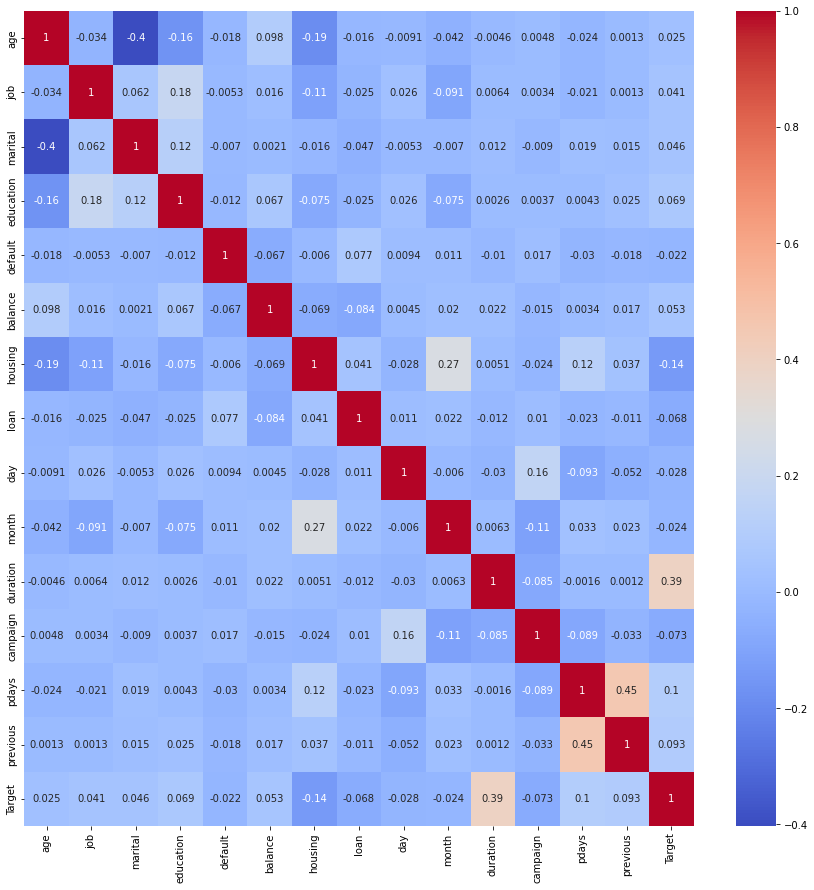

In [29]:
plt.figure(figsize=(15,15))
sns.heatmap(corr1,annot=True,cmap="coolwarm")

In [31]:
# creation of dependent , independent variable
X=df1.drop(["Target"],axis=1)
Y=df1["Target"]

In [34]:
X.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous
0,58,4,1,2,0,2143,1,0,5,8,261,1,-1,0
1,44,9,2,1,0,29,1,0,5,8,151,1,-1,0
2,33,2,1,1,0,2,1,1,5,8,76,1,-1,0
3,47,1,1,1,0,1506,1,0,5,8,92,1,-1,0
4,33,1,2,1,0,1,0,0,5,8,198,1,-1,0


In [30]:
# scaling the data
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [33]:
scale=MinMaxScaler()
X_scaled=scale.fit_transform(X)
X_scaled

array([[0.51948052, 0.4       , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.33766234, 0.9       , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.19480519, 0.2       , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.7012987 , 0.5       , 0.5       , ..., 0.06451613, 0.21215596,
        0.01090909],
       [0.50649351, 0.1       , 0.5       , ..., 0.0483871 , 0.        ,
        0.        ],
       [0.24675325, 0.2       , 0.5       , ..., 0.01612903, 0.21674312,
        0.04      ]])

In [35]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous
0,0.519481,0.4,0.5,1.0,0.0,0.092259,1.0,0.0,0.133333,0.727273,0.053070,0.0,0.0,0.0
1,0.337662,0.9,1.0,0.5,0.0,0.073067,1.0,0.0,0.133333,0.727273,0.030704,0.0,0.0,0.0
2,0.194805,0.2,0.5,0.5,0.0,0.072822,1.0,1.0,0.133333,0.727273,0.015453,0.0,0.0,0.0
3,0.376623,0.1,0.5,0.5,0.0,0.086476,1.0,0.0,0.133333,0.727273,0.018707,0.0,0.0,0.0
4,0.194805,0.1,1.0,0.5,0.0,0.072812,0.0,0.0,0.133333,0.727273,0.040260,0.0,0.0,0.0


In [ ]:
# X_scaled is our independent variable
#Y is our dependent variable----Target variable

In [ ]:
# model building process- classification algorithms

LogisticRegression
KNN
SVM
DecisionTreeClassifier
GaussianNB
BernoulliNB
RandomForestClassifier
BaggingClassifier
GradientBoostingClassifier
AdaBoostClassifier
XGBClassifier

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC # Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from xgboost import XGBClassifier

In [39]:
# model evaluation
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [41]:
LR=LogisticRegression()
KNN=KNeighborsClassifier()
svc=SVC() # Classification
DT=DecisionTreeClassifier()
gnb=GaussianNB()
bn=BernoulliNB()
rf=RandomForestClassifier()
bag=BaggingClassifier()
gb=GradientBoostingClassifier()
ad=AdaBoostClassifier()
xg=XGBClassifier()

In [ ]:
# train test split - we can create training testing data set.

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=100,stratify=Y)

In [44]:
# logistic Regression performance
LR.fit(X_train,Y_train)

LogisticRegression()

In [45]:
Y_pred=LR.predict(X_test)

In [46]:
# evaluate the performance
accuracy_score(Y_test,Y_pred)

0.8928452947030853

In [47]:
confusion_matrix(Y_test,Y_pred)

array([[7885,  100],
       [ 869,  189]], dtype=int64)

In [49]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7985
           1       0.65      0.18      0.28      1058

    accuracy                           0.89      9043
   macro avg       0.78      0.58      0.61      9043
weighted avg       0.87      0.89      0.86      9043



In [ ]:
#Random Forest with imbalance dataset

In [52]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [53]:
Y_pred=rf.predict(X_test)

In [54]:
accuracy_score(Y_test,Y_pred)

0.9036824062811014

In [55]:
confusion_matrix(Y_test,Y_pred)

array([[7765,  220],
       [ 651,  407]], dtype=int64)

In [56]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.65      0.38      0.48      1058

    accuracy                           0.90      9043
   macro avg       0.79      0.68      0.71      9043
weighted avg       0.89      0.90      0.89      9043



In [ ]:
# additive boosting -adaboost

In [57]:
ad.fit(X_train,Y_train)

AdaBoostClassifier()

In [58]:
Y_pred=ad.predict(X_test)

In [59]:
accuracy_score(Y_test,Y_pred)

0.8950569501271702

In [51]:
Y.value_counts(normalize=True)

0    0.883015
1    0.116985
Name: Target, dtype: float64

In [60]:
confusion_matrix(Y_test,Y_pred)

array([[7775,  210],
       [ 739,  319]], dtype=int64)

In [61]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7985
           1       0.60      0.30      0.40      1058

    accuracy                           0.90      9043
   macro avg       0.76      0.64      0.67      9043
weighted avg       0.88      0.90      0.88      9043



In [ ]:
# we have tried different algorithm on imbalanced dataset

In [ ]:
#LETS learn the DATA Balancing concept

In [ ]:
#X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=100,stratify=Y)

In [ ]:
#Before balancing condition

In [66]:
X_train.shape

(36168, 14)

In [67]:
Y_train.shape

(36168,)

In [68]:
Y_train.value_counts()

0    31937
1     4231
Name: Target, dtype: int64

if apply smoth approach or Oversampling approach as per theory we learnt 
0    31937
1    31937

if apply Undersampling approach  as per theory we learnt 
0    4231
1    4231

# only balance the training dataset --- testing should not be balanced

In [ ]:
# pip install imblearn

In [62]:
from imblearn.over_sampling import RandomOverSampler,SMOTE,ADASYN,BorderlineSMOTE

In [64]:
from imblearn.under_sampling import RandomUnderSampler,NearMiss

In [65]:
smote=SMOTE()
under=RandomUnderSampler()

In [ ]:
# smote technique 

In [69]:
X_train_smote,Y_train_smote=smote.fit_resample(X_train,Y_train)

In [70]:
Y_train_smote.shape

(63874,)

In [71]:
Y_train_smote.value_counts()

0    31937
1    31937
Name: Target, dtype: int64

In [73]:
X_train_smote.shape

(63874, 14)

In [ ]:
# Undersampling approach

if apply Undersampling approach  as per theory we learnt 
0    4231
1    4231

In [74]:
X_train_under,Y_train_under=under.fit_resample(X_train,Y_train)

In [75]:
X_train_under.shape

(8462, 14)

In [76]:
Y_train_under.value_counts()

0    4231
1    4231
Name: Target, dtype: int64

In [ ]:
# we are not balancing testing data

In [77]:
Y_test.value_counts()

0    7985
1    1058
Name: Target, dtype: int64

In [ ]:
# checking random forest performance on balance dataset

In [ ]:
# smote balanced dataset performance

In [78]:
rf.fit(X_train_smote,Y_train_smote)

RandomForestClassifier()

In [79]:
Y_pred=rf.predict(X_test)

In [80]:
confusion_matrix(Y_test,Y_pred)

array([[7382,  603],
       [ 404,  654]], dtype=int64)

In [81]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      7985
           1       0.52      0.62      0.57      1058

    accuracy                           0.89      9043
   macro avg       0.73      0.77      0.75      9043
weighted avg       0.90      0.89      0.89      9043



In [ ]:
# random forest performance on undersampling dataset

In [82]:
rf.fit(X_train_under,Y_train_under)


RandomForestClassifier()

In [83]:
Y_pred=rf.predict(X_test)

In [84]:
confusion_matrix(Y_test,Y_pred)

array([[6538, 1447],
       [ 151,  907]], dtype=int64)

In [85]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      7985
           1       0.39      0.86      0.53      1058

    accuracy                           0.82      9043
   macro avg       0.68      0.84      0.71      9043
weighted avg       0.91      0.82      0.85      9043



In [ ]:
# please apply all algorithm with balance and imbalance dataset

In [ ]:
# converting categorical variables to numerical variables ----get_dummies- approach
# no. of columns will be increase

In [ ]:
# please apply all algorithm with balance and imbalance dataset